In [13]:
import pandas as pd
# Likert Example
data = pd.DataFrame({
    'Question': ['Q1', 'Q2', 'Q3'],
    'Strongly Disagree': [5, 3, 4],
    'Disagree': [10, 8, 6],
    'Neutral': [15, 10, 12],
    'Agree': [20, 25, 22],
    'Strongly Agree': [10, 14, 16]
})


In [ ]:
categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

data = data[['Question'] + categories]
data


,Question,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
0,Q1,5,10,15,20,10
1,Q2,3,8,10,25,14
2,Q3,4,6,12,22,16


In [ ]:
data_percent = data.copy()
data_percent[categories] = data[categories].div(data[categories].sum(axis=1), axis=0) * 100


In [ ]:
left = ['Strongly Disagree', 'Disagree']
right = ['Agree', 'Strongly Agree']
center = ['Neutral']


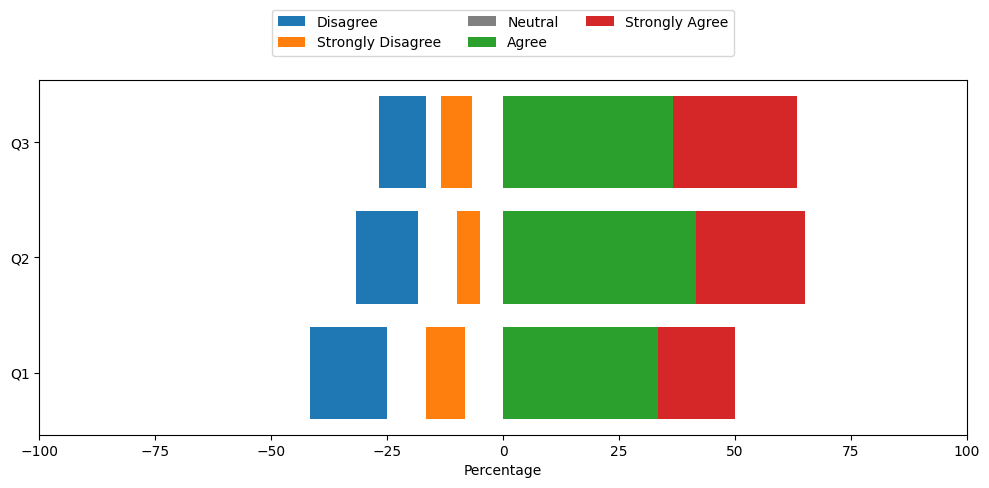

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plot left side (negative values)
left_data = -data_percent[left].cumsum(axis=1)
for col in reversed(left):
    width = data_percent[col]
    ax.barh(data['Question'], -width, left=left_data[col], label=col)

# Plot center
ax.barh(data['Question'], data_percent['Neutral'], left=0, label='Neutral', color='gray')

# Plot right side
right_data = data_percent[right].cumsum(axis=1) - data_percent[right]
for col in right:
    width = data_percent[col]
    ax.barh(data['Question'], width, left=right_data[col], label=col)

ax.set_xlim(-100, 100)
ax.set_xlabel('Percentage')
ax.legend(ncol=3, bbox_to_anchor=(0.5, 1.05), loc='lower center')
plt.tight_layout()
plt.show()
